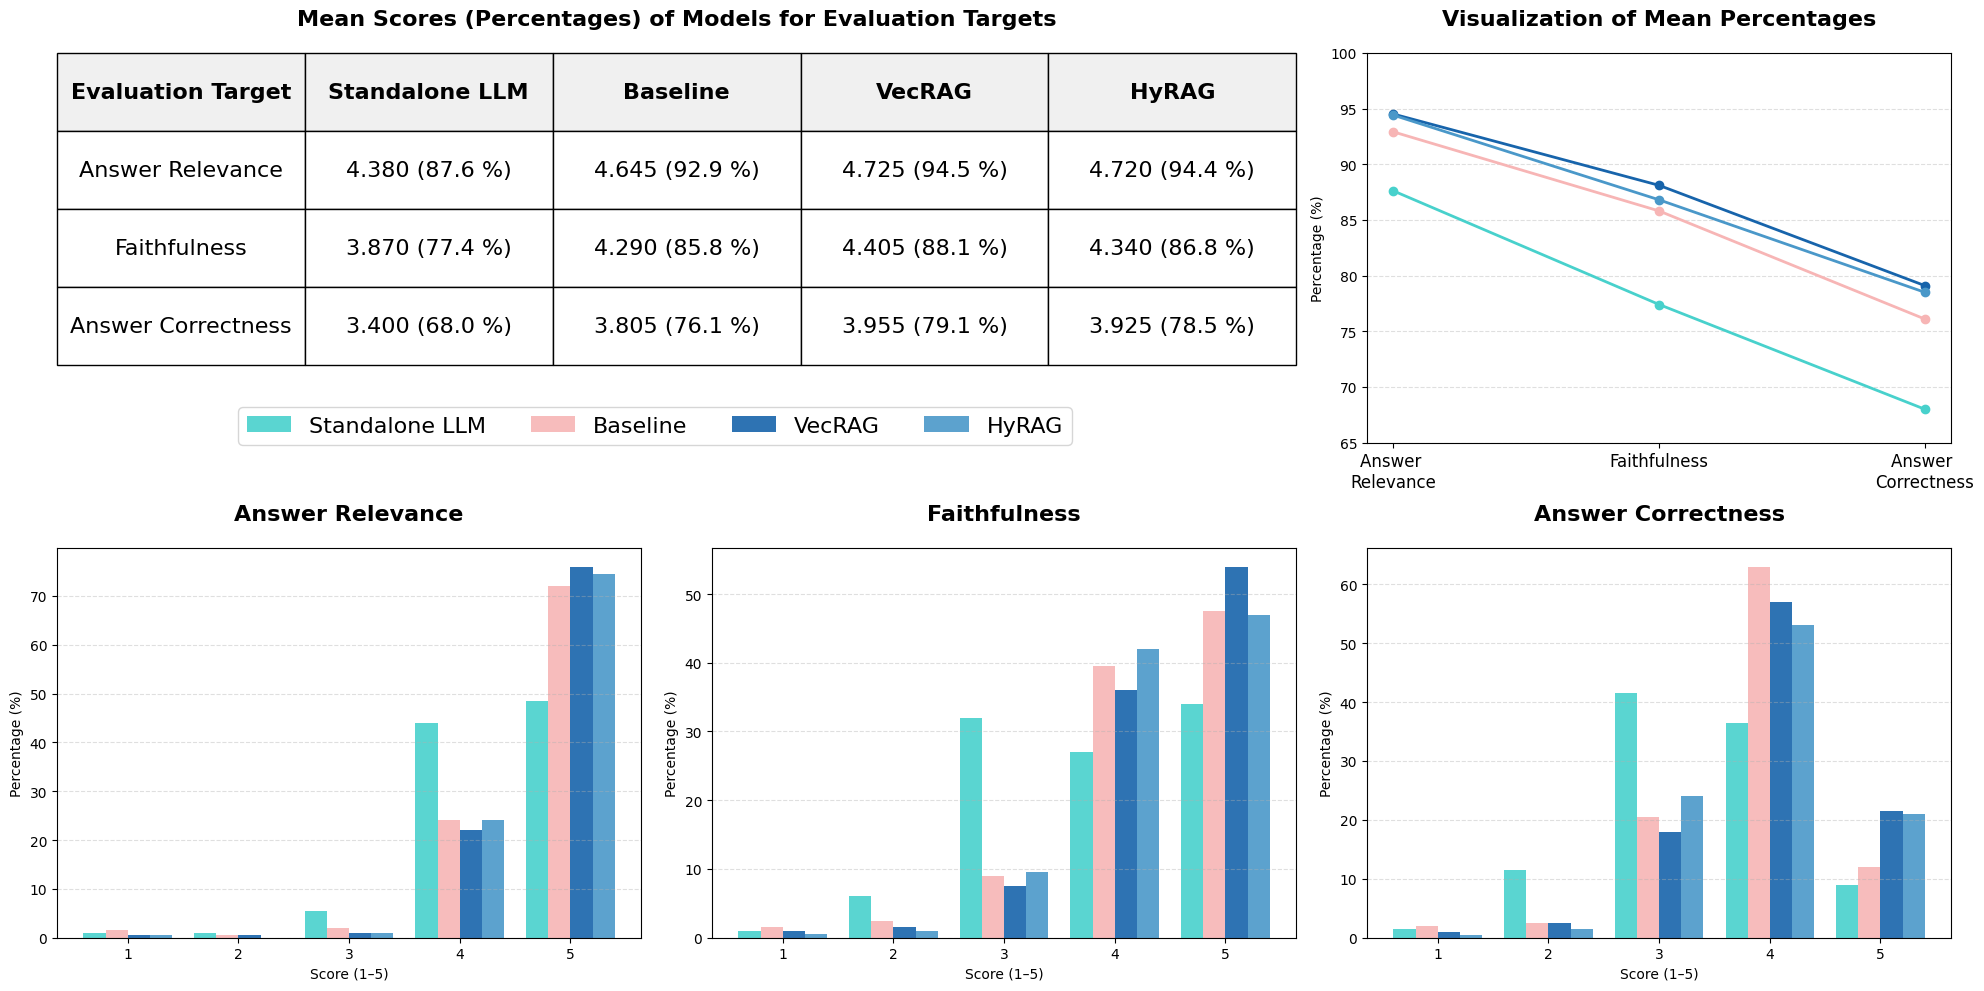

,Evaluation Target,Score,Model,Value (%)
0,Answer Relevance,1,Standalone LLM,1.0
1,Answer Relevance,2,Standalone LLM,1.0
2,Answer Relevance,3,Standalone LLM,5.5
3,Answer Relevance,4,Standalone LLM,44.0
4,Answer Relevance,5,Standalone LLM,48.5
5,Answer Relevance,1,Baseline,1.5
6,Answer Relevance,2,Baseline,0.5
7,Answer Relevance,3,Baseline,2.0
8,Answer Relevance,4,Baseline,24.0
9,Answer Relevance,5,Baseline,72.0


In [ ]:
# Code Generated with the help of ChatGPT

import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

BASELINE_COLOR = "#F7B5B5"
BLUE_COLORS = plt.cm.Blues(np.linspace(0.4, 0.8, 3))

DISPLAY_TO_COL = {
    "Answer Relevance": "Answer Relevance",
    "Faithfulness": "Faithfulness",
    "Answer Correctness": "Answer Correctness"
}

MANUAL_STATS = {
    "Answer Relevance": {
        "Standalone LLM": (4.380, 87.6),
        "Baseline": (4.645, 92.9),
        "VecRAG": (4.725, 94.5),
        "HyRAG": (4.720, 94.4)
    },
    "Faithfulness": {
        "Standalone LLM": (3.870, 77.4),
        "Baseline": (4.290, 85.8),
        "VecRAG": (4.405, 88.1),
        "HyRAG": (4.340, 86.8)
    },
    "Answer Correctness": {
        "Standalone LLM": (3.400, 68.0),
        "Baseline": (3.805, 76.1),
        "VecRAG": (3.955, 79.1),
        "HyRAG": (3.925, 78.5)
    }
}

def load_eval_jsons_by_model(model_files):
    records = []
    for model, paths in model_files.items():
        for p in paths:
            with open(p, "r", encoding="utf-8") as f:
                data = json.load(f)
            entries = data if isinstance(data, list) else [data]
            for entry in entries:
                if "ReEval" in entry and isinstance(entry["ReEval"], dict):
                    for dim in DISPLAY_TO_COL.values():
                        if dim in entry["ReEval"]:
                            entry[dim] = entry["ReEval"][dim]
                records.append({
                    "Model": model,
                    "question_context": entry.get("question_context"),
                    "Answer Relevance": entry.get("Answer Relevance"),
                    "Faithfulness": entry.get("Faithfulness"),
                    "Answer Correctness": entry.get("Answer Correctness"),
                })
    df = pd.DataFrame.from_records(records)
    df = df.dropna(subset=DISPLAY_TO_COL.values())
    return df

def plot_combined_eval(df, normalize=True, output_path="scores_hist_by_model.png"):
    score_values = [1, 2, 3, 4, 5]
    models = ["Standalone LLM", "Baseline", "VecRAG", "HyRAG"]
    colors = {
        "Standalone LLM": "mediumturquoise",
        "Baseline": BASELINE_COLOR,
        "VecRAG": BLUE_COLORS[2],
        "HyRAG": BLUE_COLORS[1]
    }

    fig = plt.figure(figsize=(20, 10))
    gs = fig.add_gridspec(2, 3, height_ratios=[1, 1])

    # --- Table ---
    ax_table = fig.add_subplot(gs[0, 0:2])
    ax_table.axis("off")

    col_labels = ["Evaluation Target"] + models

    table_data = []
    for target in DISPLAY_TO_COL.keys():
        row = [target]
        for model in models:
            mean_score, perc = MANUAL_STATS[target][model]
            row.append(f"{mean_score:.3f} ({perc:.1f} %)")
        table_data.append(row)

    table = ax_table.table(
        cellText=table_data,
        colLabels=col_labels,
        loc="center",
        cellLoc="center",
        bbox=[0, 0.2, 1, 0.8] 
    )

    table.auto_set_font_size(False)
    table.set_fontsize(16)
    

    for (row, col), cell in table.get_celld().items():
        if row == 0:  
            cell.set_text_props(fontweight='bold')
            cell.set_facecolor("#f0f0f0") 


    ax_table.set_title("Mean Scores (Percentages) of Models for Evaluation Targets",
                    fontweight="bold", fontsize=16, y=1.05)



    # --- Linegraph ---
    ax_line = fig.add_subplot(gs[0, 2])
    eval_targets = list(DISPLAY_TO_COL.keys())
    x = np.arange(len(eval_targets))
    for model in models:
        percentages = [MANUAL_STATS[target][model][1] for target in eval_targets]
        ax_line.plot(x, percentages, marker="o", label=model, color=colors[model], linewidth=2)
    ax_line.set_title("Visualization of Mean Percentages", fontweight="bold", fontsize=16, y=1.05)
    ax_line.set_xticks(x)
    ax_line.set_xticklabels(["Answer \nRelevance", "Faithfulness", "Answer \nCorrectness"], rotation=0, fontsize= 12)
    ax_line.set_ylabel("Percentage (%)")
    ax_line.set_ylim(65, 100)
    ax_line.grid(axis="y", linestyle="--", alpha=0.4)

    # --- Histograms ---
    distribution_records = []
    for idx, display_name in enumerate(DISPLAY_TO_COL.keys()):
        ax = fig.add_subplot(gs[1, idx])
        col = DISPLAY_TO_COL[display_name]
        width = 0.8 / len(models)
        offsets = np.linspace(-0.4 + width/2, 0.4 - width/2, len(models))
        ylabel = "Percentage (%)" if normalize else "Frequency"
        for i, model in enumerate(models):
            series = df.loc[df["Model"] == model, col]
            counts = series.value_counts().reindex(score_values, fill_value=0).astype(int)
            if normalize:
                total = counts.sum()
                values = (counts / total * 100.0) if total > 0 else counts.astype(float)
            else:
                values = counts
            for score, val in zip(score_values, values):
                distribution_records.append({
                    "Evaluation Target": display_name,
                    "Score": score,
                    "Model": model,
                    "Value (%)" if normalize else "Value (Count)": round(val, 2)
                })
            xvals = np.array(score_values) + offsets[i]
            ax.bar(xvals, values.values, width=width, label=model, alpha=0.9, color=colors[model])
        ax.set_title(display_name, fontweight="bold", fontsize=16, y=1.05)
        ax.set_xticks(score_values)
        ax.set_xlabel("Score (1–5)")
        ax.set_ylabel(ylabel)
        ax.grid(axis="y", linestyle="--", alpha=0.4)

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", ncol=4, bbox_to_anchor=(0.33, 0.6), fontsize=16)
    plt.tight_layout()
    plt.savefig(output_path, dpi=200)
    plt.show()

    return pd.DataFrame(distribution_records)

def calculate_and_visualize_multi_model_histograms(model_files, normalize=True):
    df = load_eval_jsons_by_model(model_files)
    dist_df = plot_combined_eval(df, normalize=normalize)
    dist_df.to_excel("score_distributions.xlsx", index=False)
    return dist_df


model_jsons = {
    "Standalone LLM": ["../../ipynb_notebooks/stand_alone_llm/eval_results/golden_qa_evalset_standalone_llm_as_a_judge_final_rejudge_results.json"],
    "Baseline": ["../../ipynb_notebooks/baseline/eval_results/golden_qa_evalset_baseline_rag_llm_as_a_judge_final_rejudge_results.json"],
    "VecRAG": ["../../ipynb_notebooks/multi_stage_enhancements/eval_results/golden_qa_evalset_optimized_vector_rag_llm_as_a_judge_final_rejudge_results.json"],
    "HyRAG": ["../../ipynb_notebooks/multi_stage_enhancements/eval_results/golden_qa_evalset_optimized_hybrid_rag_llm_as_a_judge_final_rejudge_results.json"],
}

distribution_df = calculate_and_visualize_multi_model_histograms(model_jsons, normalize=True)
display(distribution_df)


In [ ]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

BASELINE_COLOR = "#F7B5B5"
BLUE_COLORS = plt.cm.Blues(np.linspace(0.4, 0.8, 3))

DISPLAY_TO_COL = {
    "Answer Relevance": "Answer Relevance",
    "Faithfulness": "Faithfulness",
    "Answer Correctness": "Answer Correctness"
}

MANUAL_STATS = {
    "Answer Relevance": {
        "Standalone LLM": (4.38, 87.6),
        "Baseline": (4.645, 92.9),
        "VecRAG": (4.725, 94.5),
        "HyRAG": (4.72, 94.4)
    },
    "Faithfulness": {
        "Standalone LLM": (3.87, 77.4),
        "Baseline": (4.29, 85.8),
        "VecRAG": (4.405, 88.1),
        "HyRAG": (4.34, 86.8)
    },
    "Answer Correctness": {
        "Standalone LLM": (3.4, 68.0),
        "Baseline": (3.805, 76.1),
        "VecRAG": (3.955, 79.1),
        "HyRAG": (3.925, 78.5)
    }
}

def load_eval_jsons_by_model(model_files):
    records = []
    for model, paths in model_files.items():
        for p in paths:
            with open(p, "r", encoding="utf-8") as f:
                data = json.load(f)
            entries = data if isinstance(data, list) else [data]
            for entry in entries:
                if "ReEval" in entry and isinstance(entry["ReEval"], dict):
                    for dim in DISPLAY_TO_COL.values():
                        if dim in entry["ReEval"]:
                            entry[dim] = entry["ReEval"][dim]
                records.append({
                    "Model": model,
                    "question_context": entry.get("question_context"),
                    "Answer Relevance": entry.get("Answer Relevance"),
                    "Faithfulness": entry.get("Faithfulness"),
                    "Answer Correctness": entry.get("Answer Correctness"),
                })
    df = pd.DataFrame.from_records(records)
    df = df.dropna(subset=DISPLAY_TO_COL.values())
    return df

def plot_combined_eval(df, normalize=True, output_path="scores_hist_by_model.png"):
    #os.makedirs(os.path.dirname(output_path), exist_ok=True)
    score_values = [1, 2, 3, 4, 5]
    models = ["Standalone LLM", "Baseline", "VecRAG", "HyRAG"]
    colors = {
        "Standalone LLM": "mediumturquoise",
        "Baseline": BASELINE_COLOR,
        "VecRAG": BLUE_COLORS[2],
        "HyRAG": BLUE_COLORS[1]
    }

    fig, axes = plt.subplots(1, 4, figsize=(26, 6))
    distribution_records = []

    # --- 1) Liniendiagramm mit Percentages ---
    eval_targets = list(DISPLAY_TO_COL.keys())
    x = np.arange(len(eval_targets))
    for model in models:
        percentages = [MANUAL_STATS[target][model][1] for target in eval_targets]
        axes[0].plot(x, percentages, marker="o", label=model, color=colors[model], linewidth=2)

    axes[0].set_title("Mean Percentages \nper Evaluation Target", fontweight="bold", fontsize=18)
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(["Answer \nRelevance", "Faithfulness", "Answer \n Correctness"], rotation=0, fontsize=16)
    axes[0].set_ylabel("Mean Percentage (%)")
    axes[0].set_ylim(65, 100)
    axes[0].grid(axis="y", linestyle="--", alpha=0.4)

    # --- 2–4) Histogramme ---
    for ax, display_name in zip(axes[1:], DISPLAY_TO_COL.keys()):
        col = DISPLAY_TO_COL[display_name]
        width = 0.8 / len(models)
        offsets = np.linspace(-0.4 + width/2, 0.4 - width/2, len(models))
        ylabel = "Percentage (%)" if normalize else "Frequency"

        for i, model in enumerate(models):
            series = df.loc[df["Model"] == model, col]
            counts = series.value_counts().reindex(score_values, fill_value=0).astype(int)
            if normalize:
                total = counts.sum()
                values = (counts / total * 100.0) if total > 0 else counts.astype(float)
            else:
                values = counts

            # Speichern für DataFrame-Ausgabe
            for score, val in zip(score_values, values):
                distribution_records.append({
                    "Evaluation Target": display_name,
                    "Score": score,
                    "Model": model,
                    "Value (%)" if normalize else "Value (Count)": round(val, 2)
                })

            xvals = np.array(score_values) + offsets[i]
            ax.bar(xvals, values.values, width=width, label=model, alpha=0.9, color=colors[model])

        ax.set_title(display_name, fontweight="bold", fontsize=18)
        ax.set_xticks(score_values)
        ax.set_xlabel("Score (1–5)")
        ax.set_ylabel(ylabel)
        ax.grid(axis="y", linestyle="--", alpha=0.4)

    handles, labels = axes[1].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", ncol=4, bbox_to_anchor=(0.5, 1.01), fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.92])

    plt.savefig(output_path, dpi=200)
    plt.show()

    dist_df = pd.DataFrame(distribution_records)
    return dist_df


def calculate_and_visualize_multi_model_histograms(model_files, normalize=True):
    df = load_eval_jsons_by_model(model_files)
    dist_df = plot_combined_eval(df, normalize=normalize)
    dist_df.to_excel("score_distributions.xlsx", index=False)
    return dist_df


# Beispielaufruf
model_jsons = {
    "Standalone LLM": ["../../ipynb_notebooks/stand_alone_llm/eval_results/golden_qa_evalset_standalone_llm_as_a_judge_final_rejudge_results.json"],
    "Baseline": ["../../ipynb_notebooks/baseline/eval_results/golden_qa_evalset_baseline_rag_llm_as_a_judge_final_rejudge_results.json"],
    "VecRAG": ["../../ipynb_notebooks/multi_stage_enhancements/eval_results/golden_qa_evalset_optimized_vector_rag_llm_as_a_judge_final_rejudge_results.json"],
    "HyRAG": ["../../ipynb_notebooks/multi_stage_enhancements/eval_results/golden_qa_evalset_optimized_hybrid_rag_llm_as_a_judge_final_rejudge_results.json"],
}

distribution_df = calculate_and_visualize_multi_model_histograms(model_jsons, normalize=True)

display(distribution_df)

Matching IDs: [75, 76, 77, 78, 79, 83, 86, 88, 97, 100, 101, 102, 104, 105, 106, 107, 111, 112, 113, 114, 115, 117, 118, 127, 133, 146, 151, 155, 156, 157, 159, 161, 162, 165, 167, 168, 169, 170, 172, 174, 183, 185, 186, 187, 188, 193, 200]
Übereinstimmung: 23.50%
